# Get transaction data for Bancor for one day
Date: 2018-01-13 \
Token: Bancor (BNT) \
Contract: 0x1F573D6Fb3F13d689FF844B4cE37794d79a7FF1C

In [32]:
contract = "0x1F573D6Fb3F13d689FF844B4cE37794d79a7FF1C"
symbol = "bnt"

In [33]:
import requests

URL = "https://api.coingecko.com/api/v3/coins/list?include_platform=true"
r = requests.get(url = URL)
data = r.json()

for token in data:
    if token["symbol"] == symbol:
        print(token)
        eth_address = token["platforms"]["ethereum"]

print("Is contract equal to API-Data?: ", eth_address == contract.lower())

{'id': 'bancor', 'symbol': 'bnt', 'name': 'Bancor Network', 'platforms': {'ethereum': '0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c', 'energi': '0x9419e8edcf570a71eb0dd006602949742b711a80'}}
Is contract equal to API-Data?:  True


In [34]:
import time
import datetime

start_date = datetime.datetime.strptime("2018-01-12 12:00", "%Y-%m-%d %H:%M")
end_date = datetime.datetime.strptime("2018-01-14 12:00", "%Y-%m-%d %H:%M")

unix_start_date = time.mktime(start_date.timetuple())
unix_end_date = time.mktime(end_date.timetuple())

In [35]:
URL = f"https://coins.llama.fi/block/ethereum/{unix_start_date}"
r = requests.get(url = URL)
data = r.json()
block_number_start = data["height"]

URL = f"https://coins.llama.fi/block/ethereum/{unix_end_date}"
r = requests.get(url = URL)
data = r.json()
block_number_end = data["height"]

In [36]:
hex_block_number_start = hex(block_number_start)
hex_block_number_end = hex(block_number_end)

In [37]:
# All data for that day
import json

alchemy_api_key = "4zWEsHMFRJ5CqkZLIp5m3322BRPbwB1q"
my_url = f"https://eth-mainnet.g.alchemy.com/v2/{alchemy_api_key}"
my_headers = {
    "Accept": "application/json",
    "Content-Type": "application/json"
}
params = {'jsonrpc': '2.0', 'method': 'alchemy_getAssetTransfers', 'params': [
    {
      "fromBlock": hex_block_number_start,
      "toBlock": hex_block_number_end,
      "contractAddresses": [contract],
      "category": ["erc20"],
      "withMetadata": True,
      "excludeZeroValue": True,
      # "maxCount": "0x3e8" # maximum transactions possible
    }
  ]}


r = requests.post(url = my_url, json=params, headers=my_headers)
data = r.json()
json_data = json.dumps(data, indent=4)
 
with open(f"alchemy_answer_{symbol}.json", "w") as outfile:
    outfile.write(json_data)

json_data = json.loads(json_data)
print("Number of returned transfers: ",len(json_data["result"]["transfers"]))

Number of returned transfers:  1000


In [44]:
if "pageKey" in json_data["result"]:
    print("Key exist in JSON data")
    print(json_data["result"]["pageKey"])
else:
    print("Key doesn't exist in JSON data")

Key exist in JSON data
316bfc51-f118-4e11-83bb-65a945faf577


In [38]:
timestamps = list()
for transfer in json_data["result"]["transfers"]:
    timestamps.append(transfer['metadata']['blockTimestamp'])

In [39]:
def set_time_to_zero(timestamp):
    print(timestamp)
    parts = timestamp.split('T')
    date = parts[0]
    time_parts = parts[1].split(':')
    hour = time_parts[0]
    modified_timestamp = date + ' ' + hour + ':00:00'
    return modified_timestamp

timestamps = [set_time_to_zero(timestamp) for timestamp in timestamps]
print(timestamps)


2018-01-12T11:00:03.000Z
2018-01-12T11:04:56.000Z
2018-01-12T11:06:37.000Z
2018-01-12T11:11:28.000Z
2018-01-12T11:11:28.000Z
2018-01-12T11:11:28.000Z
2018-01-12T11:13:53.000Z
2018-01-12T11:13:53.000Z
2018-01-12T11:13:53.000Z
2018-01-12T11:13:53.000Z
2018-01-12T11:16:20.000Z
2018-01-12T11:16:20.000Z
2018-01-12T11:20:10.000Z
2018-01-12T11:20:10.000Z
2018-01-12T11:23:03.000Z
2018-01-12T11:27:23.000Z
2018-01-12T11:27:23.000Z
2018-01-12T11:31:04.000Z
2018-01-12T11:32:48.000Z
2018-01-12T11:33:47.000Z
2018-01-12T11:35:53.000Z
2018-01-12T11:37:34.000Z
2018-01-12T11:37:34.000Z
2018-01-12T11:39:42.000Z
2018-01-12T11:39:42.000Z
2018-01-12T11:40:29.000Z
2018-01-12T11:41:52.000Z
2018-01-12T11:41:52.000Z
2018-01-12T11:41:52.000Z
2018-01-12T11:43:14.000Z
2018-01-12T11:43:14.000Z
2018-01-12T11:45:53.000Z
2018-01-12T11:45:53.000Z
2018-01-12T11:47:18.000Z
2018-01-12T11:47:18.000Z
2018-01-12T11:49:01.000Z
2018-01-12T11:49:01.000Z
2018-01-12T11:50:26.000Z
2018-01-12T11:50:44.000Z
2018-01-12T11:50:44.000Z


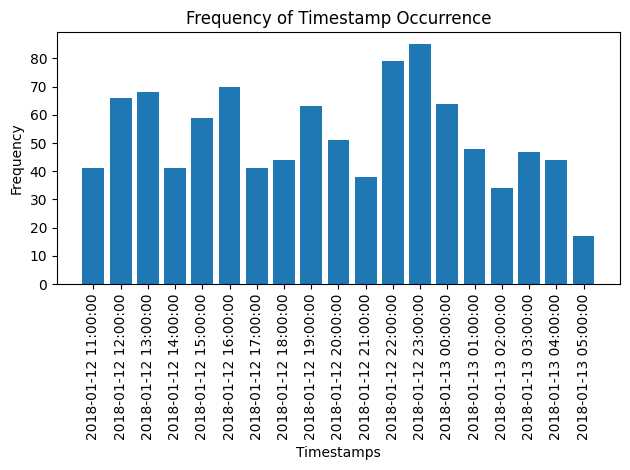

In [40]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())

plt.bar(x, y)
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.show()

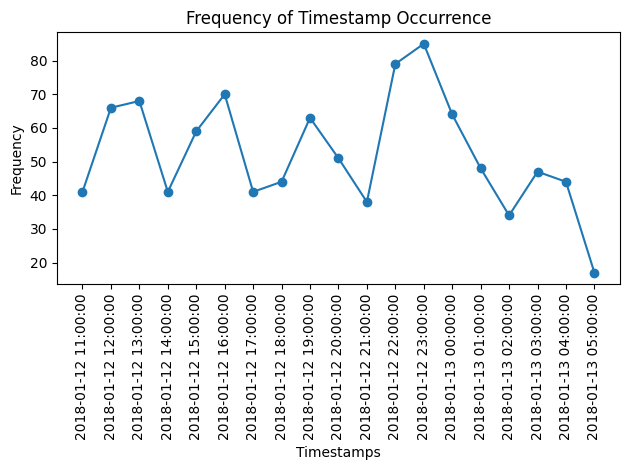

In [41]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())
plt.plot(x, y, marker='o')
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.show()

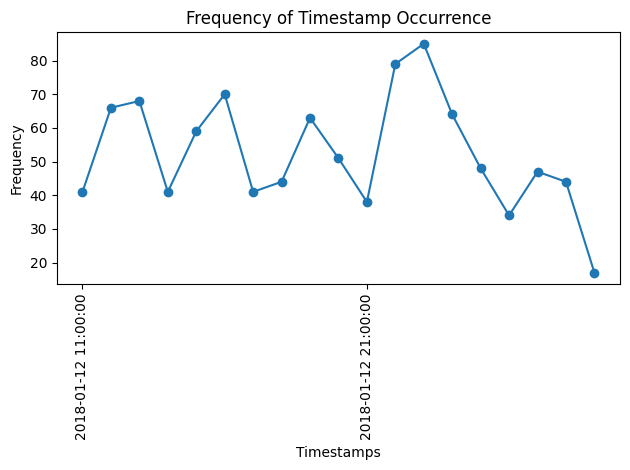

In [42]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())


plt.plot(x, y, marker='o')
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')

tick_indices = list(range(0, len(labels), 10))
tick_labels = [labels[i] for i in tick_indices]
plt.xticks(tick_indices, tick_labels, rotation='vertical')
plt.tight_layout()
plt.show()
